<a href="https://colab.research.google.com/github/rodrigosantis1/simulation-production-systems/blob/main/Pr%C3%A1tica_2_Distribui%C3%A7%C3%A3o_Poisson_Resolvido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [26]:
chegadas = [
    2, 4, 6, 7, 7, 3, 5, 8, 4, 8, 3, 5, 4, 8, 5, 4, 3, 5, 4, 8, 4, 3, 6, 8, 4,
    5, 2, 6, 4, 8, 3, 7, 10, 12, 11, 10, 3, 6, 7, 3, 5, 2, 5, 4, 5, 4, 5, 4, 7,
    5, 6, 9, 3, 3, 7, 3, 4, 2, 0, 9, 4, 5, 6, 2, 6, 2, 4, 2, 2, 6, 5, 2, 4, 1,
    7, 4, 6, 5, 9, 3
]

df = pd.DataFrame({'chegadas':chegadas})
display(df.head())

,chegadas
0,2
1,4
2,6
3,7
4,7


1. Apresente a distribuição de frequência deste conjunto de dados:
2. Trace o gráfico.
3. Verifique, graficamente, se o ritmo de chegadas se aproxima de uma Distribuição de Poisson.

In [27]:
df_summary = df['chegadas'].value_counts().sort_index().reset_index()
df_summary.columns = ['Ritmo', 'Freq. Abs']
df_summary['Freq. Rel'] = df_summary['Freq. Abs']/df_summary['Freq. Abs'].sum()
df_summary['Poiss'] = stats.poisson.pmf(df_summary['Ritmo'], df['chegadas'].mean())
display(df_summary)

,Ritmo,Freq. Abs,Freq. Rel,Poiss
0,0,1,0.0125,0.006572
1,1,1,0.0125,0.033022
2,2,9,0.1125,0.082968
3,3,11,0.1375,0.138972
4,4,16,0.2000,0.174584
5,5,13,0.1625,0.175456
6,6,9,0.1125,0.146945
7,7,7,0.0875,0.105485
8,8,6,0.0750,0.066258
9,9,3,0.0375,0.036994


<Axes: >

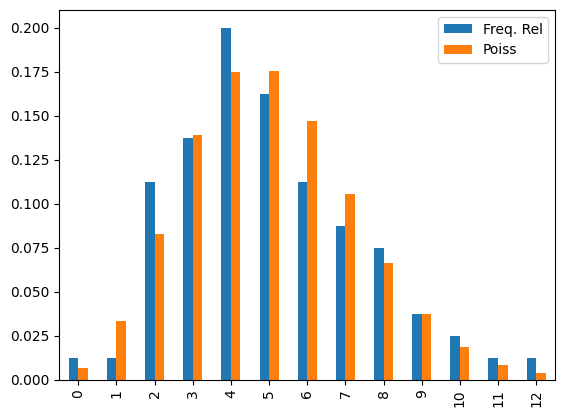

In [28]:
df_summary[['Freq. Rel', 'Poiss']].plot.bar()

#### Desafio: Realize tambéum um teste estatístico (Qui-Quadrado ou Kolmogorov-Smirnov) para verificar se as chegdas seguem uma distribuição de Poisson, usando um p-value $\alpha=0.05$.


$H_0:$ Dados seguem uma distribuição de Poisson.

$H_1:$ Dados não seguem uma distribuição de Poisson.

Estimativa de lambda: 5.03
Estatística do Qui-Quadrado: 5.76
Valor-p: 0.9276
Não rejeitamos H0: os dados seguem uma distribuição de Poisson.


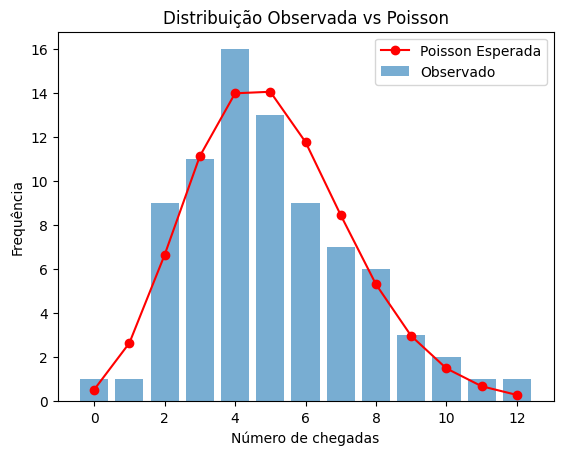

In [31]:
# Estimativa do parâmetro lambda (média das chegadas)
lambda_hat = np.mean(chegadas)

# Frequências observadas
valores_unicos, contagens = np.unique(chegadas, return_counts=True)

# Frequências esperadas sob a distribuição de Poisson
probabilidades_poisson = stats.poisson.pmf(valores_unicos, lambda_hat)
frequencias_esperadas = probabilidades_poisson * len(chegadas)

# Normalizar para garantir que as somas sejam iguais
frequencias_esperadas *= sum(contagens) / sum(frequencias_esperadas)

# Teste Qui-Quadrado
chi2_stat, p_value = stats.chisquare(f_obs=contagens, f_exp=frequencias_esperadas)

# Resultados
print(f"Estimativa de lambda: {lambda_hat:.2f}")
print(f"Estatística do Qui-Quadrado: {chi2_stat:.2f}")
print(f"Valor-p: {p_value:.4f}")

# Interpretação
if p_value > 0.05:
    print("Não rejeitamos H0: os dados seguem uma distribuição de Poisson.")
else:
    print("Rejeitamos H0: os dados NÃO seguem uma distribuição de Poisson.")

# Comparação gráfica
plt.bar(valores_unicos, contagens, alpha=0.6, label="Observado")
plt.plot(valores_unicos, frequencias_esperadas, 'ro-', label="Poisson Esperada")
plt.xlabel("Número de chegadas")
plt.ylabel("Frequência")
plt.legend()
plt.title("Distribuição Observada vs Poisson")
plt.show()